# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [1]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import matplotlib.pyplot as plt
#new comment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [98]:
df=pd.read_csv("./Gruppe1_SS23/Messung2/Messung2_Daten.csv")
df["Events"]=df["Events"]/4 #in this column now only events per 15s

#Part (i)
A=df["Events"].mean() #Activity multiplied by 15s is a mean value for Poisson distribution

#UNCERTAINTIES - first divide A with 15 in order to get a number of events per second
    #further multiply by 891.057 seconds in order to get the number of total events
    #sqrt of that deliveres an uncertainty fot the whole measure sequence
    #divide with 891.057 and multiply by 15 to get uncertainty for 15s
uncertEvents=np.sqrt(A/15*891.057)/891.057*15

Nmean=ufloat(A, uncertEvents)
print(Nmean) #Mean value with uncertainty (i) int=15s

9.1+/-0.4


In [99]:
#Part (ii)
sigma_Sample=np.std(df["Events"]) #std of the Sample
sigma_Sample_uncert=sigma_Sample/np.sqrt(2*(len(df["Events"])-1)) #uncertainty of std of the sample
std_Sample=ufloat(sigma_Sample, sigma_Sample_uncert)
print(std_Sample) #std of the Sample (ii)

3.73+/-0.34


In [100]:
#Part (iii)
sigma_P=np.sqrt(A) #std of Poisson distribution with a mean of our measure sequence
sigma_P

3.011090610836324

In [101]:
#Part (iv)
sumOfEvents=df["Events"].sum() #actually n_N
sumOfEvents

544.0

In [102]:
#Part (v)
sigma_N=np.sqrt(sumOfEvents)
sigma_N

23.323807579381203

In [103]:
N=len(df["Events"])
print(sigma_N/N)
print(sigma_Sample)
print(sigma_P)

0.38873012632302006
3.7321426672742413
3.011090610836324


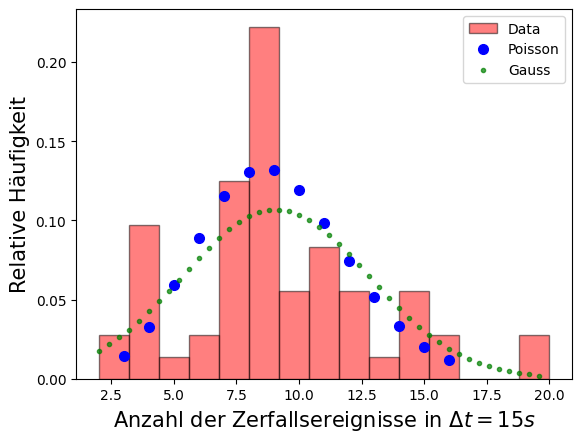

In [105]:
from scipy.stats import poisson, norm
plt.hist(df["Events"], color="red", label="Data", edgecolor="black", density=True, bins=15, alpha=0.5)

#Plotting a Poisson distribution
mean, var, skew, kurt = poisson.stats(A, moments='mvsk')
x = np.arange(poisson.ppf(0.01, A),
              poisson.ppf(0.99, A))
plt.plot(x, poisson.pmf(x, A), 'bo', ms=7, label='Poisson')
#plt.vlines(x, 0, poisson.pmf(x, A), colors='b', lw=5, alpha=0.3)

#Plotting a Gaussiean distribution
x = np.arange(df["Events"].min(), df["Events"].max(), 0.4)
plt.plot(x, norm.pdf(x, loc=A, scale=sigma_Sample),
       '.', lw=10, alpha=0.7, label='Gauss', color="green")
#plt.vlines(x, 0, norm.pdf(x, loc=A, scale=sigma_Sample), colors='green', lw=5, alpha=0.3)

plt.legend()
plt.xlabel(r'Anzahl der Zerfallsereignisse in $\Delta t=15s$', size=15)
plt.ylabel('Relative Häufigkeit', size=15)
plt.show()